In [1]:
import os
import pandas as pd
import numpy as np
import gc
from sklearn import metrics
from functools import partial
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

ix = os.getcwd().index('umich-mads-capstone-project')
ROOT_PATH = os.path.join(os.getcwd()[:ix], 'umich-mads-capstone-project')

patient_data_path = os.path.join(ROOT_PATH, 'data/rsna/rsna-patient-details.csv')

In [3]:
df_patients = pd.read_csv(patient_data_path, index_col='index')

df_patients['age_group'] = pd.cut(df_patients.patient_age, 
                                  [0, 1, 5, 12, 18, 44, 64, 79, np.inf], 
                                  labels=['Infant 1 year-old', 
                                          'preschool (2-5)', 
                                          'Child (6-12)', 
                                          'Adolescent (13-18)', 
                                          'Adult (19-44)', 
                                          'Middle age (45-64)', 
                                          'Aged (65-79)', 
                                          'Aged 80+'])
df_patients['view_position'] = df_patients['view_position'].map({'AP':'Anterior/Posterior', 'PA':'Posterior/Anterior'})
df_patients.head()

,patient_id,patient_age,patient_sex,view_position,class,target,split,densenet_predict_proba,age_group
index,,,,,,,,,
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,51,F,Posterior/Anterior,No Lung Opacity / Not Normal,0,train,0.028890,Middle age (45-64)
1,000924cf-0f8d-42bd-9158-1af53881a557,19,F,Anterior/Posterior,Normal,0,train,0.002505,Adult (19-44)
2,000db696-cf54-4385-b10b-6b16fbb3f985,25,F,Anterior/Posterior,Lung Opacity,1,train,0.226189,Adult (19-44)
3,000fe35a-2649-43d4-b027-e67796d412e0,40,M,Anterior/Posterior,Lung Opacity,1,train,0.967209,Adult (19-44)
4,001031d9-f904-4a23-b3e5-2c088acd19c6,57,M,Posterior/Anterior,Lung Opacity,1,train,0.067874,Middle age (45-64)


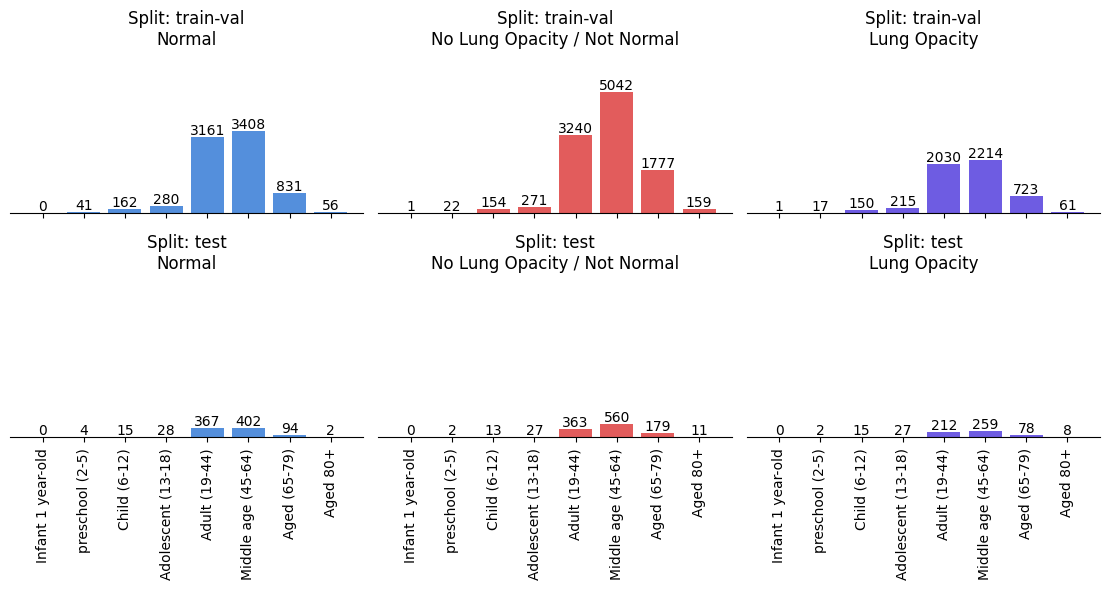

In [14]:
from matplotlib import cm

def plot_feature_and_classes(data, feature, figsize, rotation=None, save_path=None):
    splits = [['train', 'val'], ['test']]
    classes = ['Normal', 'No Lung Opacity / Not Normal', 'Lung Opacity']
    colors = ['#1b6ad1', '#d92525', '#3d25d9']
    
    fig, axs = plt.subplots(nrows=2, ncols=3, dpi=100, figsize=figsize, sharex=True, sharey=True)
    
    for n in range(axs.shape[0]):
        for i in range(axs.shape[1]):
            split = splits[n]
            class_ = classes[i]
            color = colors[i]
            ax = axs[n, i]

            plot_data = (data[(data['split'].isin(split)) & (data['class']==class_)]
                         [feature]
                         .value_counts()
                         .sort_index())
            
            x, y = plot_data.index.astype(str).tolist(), plot_data.values

            p1 = ax.bar(x, y, color=color, alpha=.75)
            ax.bar_label(p1)
            ax.set_title('Split: {}\n{}'.format('-'.join(split), class_), pad=30)

            if n==1 and rotation:
                ticks_loc = ax.get_xticks()
                ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
                ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

            ax.get_yaxis().set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)

    fig.tight_layout()
    
    if save_path:
        plt.savefig(save_path, format='png', orientation='landscape')
        
    plt.show()

save_path='/home/tstrebel/repos/umich-mads-capstone-project/figures/age-groups.png'
figsize=np.array([6.4*1.75, 4.8*1.25])
plot_feature_and_classes(df_patients, rotation=90, figsize=figsize, feature='age_group', save_path=save_path)

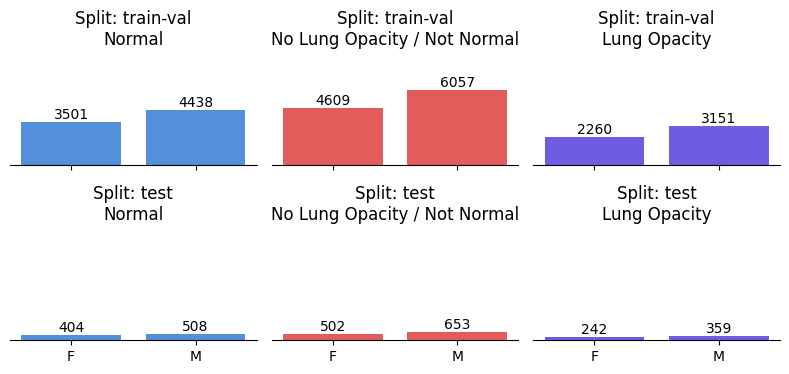

In [15]:
save_path='/home/tstrebel/repos/umich-mads-capstone-project/figures/patient-sex.png'
figsize=np.array([6.4*1.25, 4.8*.8])
plot_feature_and_classes(df_patients, feature='patient_sex', figsize=figsize, save_path=save_path)

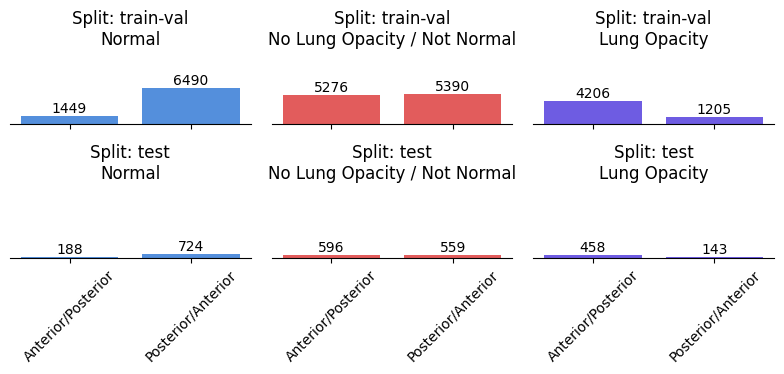

In [16]:
save_path='/home/tstrebel/repos/umich-mads-capstone-project/figures/view-position.png'
figsize=np.array([6.4*1.25, 4.8*.8])
plot_feature_and_classes(df_patients, feature='view_position', rotation=45, figsize=figsize, save_path=save_path)